In [26]:
import numpy as np
import pandas as pd

import glob
import os
import matplotlib.pyplot as plt


In [27]:

all_files = glob.glob("./TestResults/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

frame = pd.concat(li, axis=0, ignore_index=True)

In [19]:
frame

,TestResult.DisplayName,TestResult.Outcome,TestResult.Duration,TestResult.ResourceCount
0,evaluator.evalRecordExprLemmaOk (correctness) ...,Passed,00:00:01.5671867,2478480
1,evaluator.evalRecordExprLemmaOk (correctness) ...,Passed,00:00:01.4228265,2284127
2,evaluator.evalRecordExprLemmaOk (correctness) ...,Passed,00:00:01.3738931,3773353
3,evaluator.evalRecordExprLemmaOk (correctness) ...,Passed,00:00:01.3674580,3201433
4,evaluator.evalRecordExprLemmaOk (correctness) ...,Passed,00:00:01.3265695,2087746
...,...,...,...,...
10595,inferVal (well-formedness) (assertion batch 0),Passed,00:00:00.0490587,85046
10596,envHasCtx (well-formedness) (assertion batch 0),Passed,00:00:00.0476293,86653
10597,inferVal (well-formedness) (assertion batch 0),Passed,00:00:00.0451708,85037
10598,inferVal (well-formedness) (assertion batch 0),Passed,00:00:00.0440857,85052


In [20]:
def timedelta_to_microseconds(delta):
    return delta.days * 24 * 3600 * 1e6 + delta.seconds * 1e6 + delta.microseconds

In [28]:
#Filter for only correctness
frame = frame[frame['TestResult.DisplayName'].str.contains('\(correctness\)')]

methods = np.array(["soundDirect","soundMonadic","soundBidir","soundSemantic","soundInversionSemantic"])

subframes = {}
for method in methods:
    subframes[method] = frame[frame['TestResult.DisplayName'].str.contains(method)]
    subframes[method]['TestResult.Duration'] = pd.to_timedelta(subframes[method]['TestResult.Duration']).apply(timedelta_to_microseconds)

# directFrame = frame[frame['TestResult.DisplayName'].str.contains('soundDirect')]
# monadicFrame = frame[frame['TestResult.DisplayName'].str.contains('soundMonadic')]
# bidirFrame = frame[frame['TestResult.DisplayName'].str.contains('soundBidir')]
# semanticFrame = frame[frame['TestResult.DisplayName'].str.contains('soundSemantic')]
# inversionSemanticFrame = frame[frame['TestResult.DisplayName'].str.contains('soundInversionSemantic')]

# directFrame['TestResult.Duration'] = pd.to_timedelta(directFrame['TestResult.Duration']).apply(timedelta_to_microseconds)
# monadicFrame['TestResult.Duration'] = pd.to_timedelta(monadicFrame['TestResult.Duration']).apply(timedelta_to_microseconds)
# bidirFrame['TestResult.Duration'] = pd.to_timedelta(bidirFrame['TestResult.Duration']).apply(timedelta_to_microseconds)
# semanticFrame['TestResult.Duration'] = pd.to_timedelta(semanticFrame['TestResult.Duration']).apply(timedelta_to_microseconds)
# inversionSemanticFrame['TestResult.Duration'] = pd.to_timedelta(inversionSemanticFrame['TestResult.Duration']).apply(timedelta_to_microseconds)

/var/folders/rj/yzfg8y3s62x51yphd1_qtjxm0000gq/T/ipykernel_94136/409341278.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subframes[method]['TestResult.Duration'] = pd.to_timedelta(subframes[method]['TestResult.Duration']).apply(timedelta_to_microseconds)
/var/folders/rj/yzfg8y3s62x51yphd1_qtjxm0000gq/T/ipykernel_94136/409341278.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subframes[method]['TestResult.Duration'] = pd.to_timedelta(subframes[method]['TestResult.Duration']).apply(timedelta_to_micr

Text(0, 0.5, 'Mean Verification Duration (ms)')

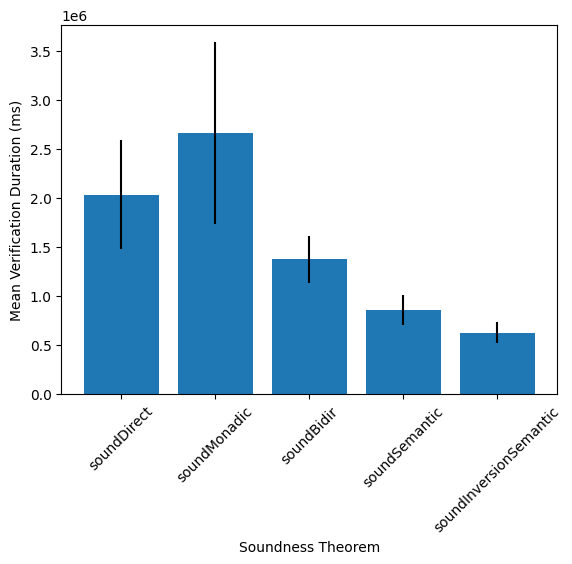

In [29]:
duration_means = {name: table['TestResult.Duration'].mean() for name, table in subframes.items()}
duration_stdevs = {name: table['TestResult.Duration'].std() for name, table in subframes.items()}
plt.bar(duration_means.keys(), duration_means.values(), yerr = duration_stdevs.values())
plt.xticks(rotation=45)
plt.xlabel('Soundness Theorem')
plt.ylabel('Mean Verification Duration (ms)')

Text(0, 0.5, 'Duration CVs')

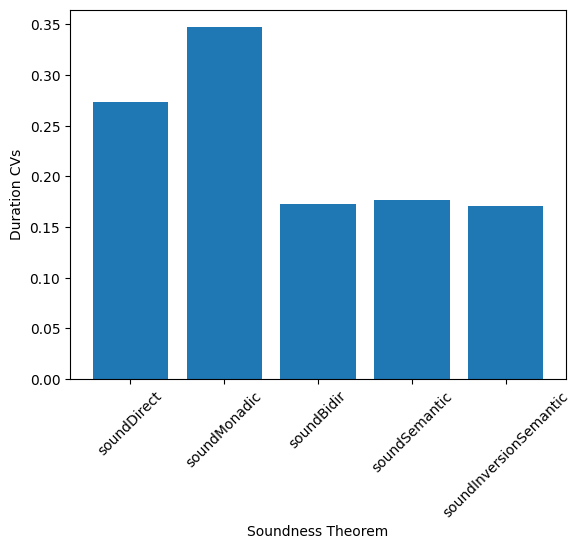

In [30]:
duration_cvs = {name: table['TestResult.Duration'].std() / table['TestResult.Duration'].mean() for name, table in subframes.items()}
plt.bar(duration_cvs.keys(), duration_cvs.values())
plt.xticks(rotation=45)
plt.xlabel('Soundness Theorem')
plt.ylabel('Duration CVs')

Text(0, 0.5, 'Mean Resource Counts')

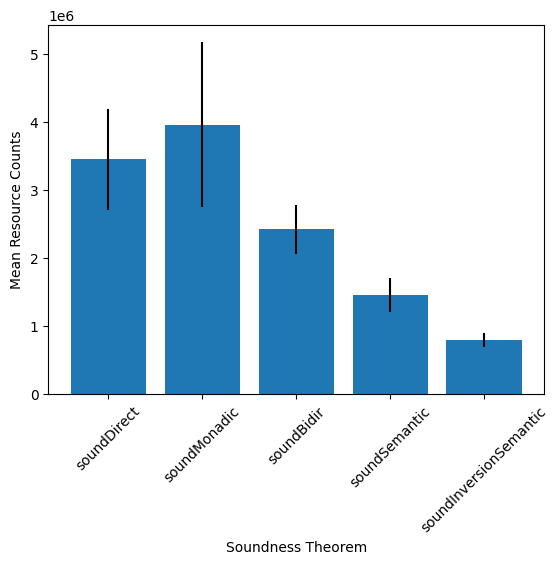

In [31]:
resource_means = {name: table['TestResult.ResourceCount'].mean() for name, table in subframes.items()}
resource_stdevs = {name: table['TestResult.ResourceCount'].std() for name, table in subframes.items()}
plt.bar(resource_means.keys(), resource_means.values(), yerr = resource_stdevs.values())
plt.xticks(rotation=45)
plt.xlabel('Soundness Theorem')
plt.ylabel('Mean Resource Counts')

Text(0, 0.5, 'Resource Count CVs')

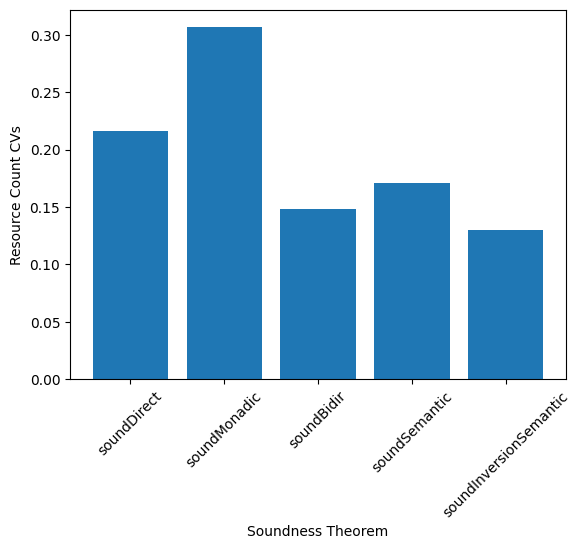

In [32]:
resource_cvs = {name: table['TestResult.ResourceCount'].std() / table['TestResult.ResourceCount'].mean() for name, table in subframes.items()}
plt.bar(resource_cvs.keys(), resource_cvs.values())
plt.xticks(rotation=45)
plt.xlabel('Soundness Theorem')
plt.ylabel('Resource Count CVs')